# Introduction à la compression d'images

Nous observons actuellement une augmentation importante du volume de données vidéo disponibles, par exemple sous forme de séries qui sont diffusées en _web-streaming_ (Netflix pour n'en citer qu'un). 

La vidéo est en train de devenir une des principales sources d’informations (YouTube délivre plus de 100 millions de séquences vidéo chaquejour sur Internet) et tend à être de plus en plus omniprésente. L'entreprise Cisco prévoyait qu’en 2012, la vidéo représenterai 50% du trafic Internet et qu’en 2015, 100 millions de minutes de vidéo etaient diffusées sur Internet chaque seconde, en 2019 on est passé au dela de cette limite. Aujourd'hui la plupart des recherches concernant des pratiques se font directement à partir de Youtube.

La diffusion de cette masse de données nécessite d'extraire de chaque image individuelle "la substantifique moelle", c'est à dire les informations qui permettent de la décrire le plus succintement possible. Dans ce cours nous allons voire les bases de la compression d'images en se servant d'un exemple issu du monde réel. Celui de la compression par regroupemment de domaines adjacents, grâce à un graphe. Un domaine est un ensemble connexe de pixels ayant des propriétés similaires (par exemple : deux couleurs similaires, on dit alors qu'elles sont plates). Un graphe est un outil mathématique qui sert avant tout à manipuler des concepts, et à établir un lien entre ces concepts. Il s'agit d'une notion d'algorithmique qui a été très utilisée dans la théorie des reseaux sociaux.

In [1]:
%matplotlib inline


## Regrouppement des images en se servant d'un graphe 

Cet exemple construit le graphe des zones quasi plates (appellé en Anglais Region Adjacency Graph ou RAG). Il regroupe progressivement les régions semblables en termes de couleurs pour transformer l'image en une mosaique de pavés colorées de la même manière.
L'union de deux régions adjacentes produit une nouvelle région regroupant tout les pixels de la région sous une même couleur. Un peu comme dans une conquête.
Les régions sont regroupées jusqu'a ce qu'il n'y ai plus qu'une région similaire.


In [2]:
# On va commencer par importer des fonctions de 
# la librairie scikit-image https://scikit-image.org/
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


Nous allons partir d'une tasse de café, qui fait partie des images de la base de données.

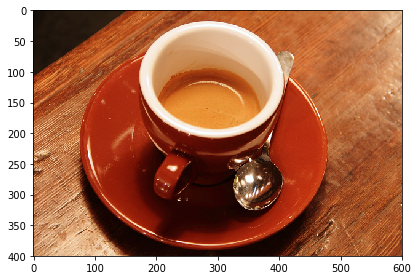

In [3]:
img = data.coffee()
io.imshow(img)

In [4]:
# Dans ce bloc deux fonctions sont crées pour
# manipuler les couleurs

def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])



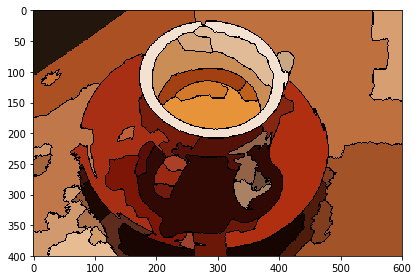

In [5]:
# Maintenant on fait tourner la segmentation de l'image
# il convient de noter ce qui se passe quand on étiquette 400 segments
labels = segmentation.slic(img, compactness=30, n_segments=400)

# On vous demande de ne pas modifier le code suivant
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

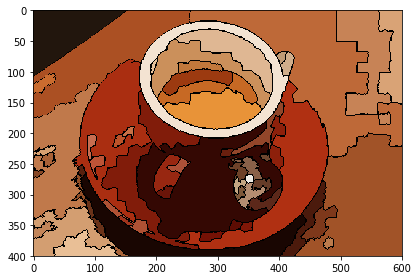

In [6]:
# Maintenant on fait tourner la segmentation de l'image
# il convient de noter ce qui se passe quand on étiquette 800 segments
labels = segmentation.slic(img, compactness=30, n_segments=800)

# On vous demande de ne pas modifier le code suivant
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0,0,0))
io.imshow(out)
io.show()

Ce deuxième cas montre deux choses :
> - Le cercle du bord de la tasse est complet, et l'on peut faire passer un cercle par dessus sans discontinnuité
> - Une petite tache blanche correspondant à un éclat de lumière vient d'apparaître sur la cuillère. 

## Exercice
Pouvez vous décrire avec des mots les parties essetielles de l'image si dessous qui à été simplifiée à l'extrème ? 

In [7]:
labels = segmentation.slic(img, compactness=5, n_segments=10)

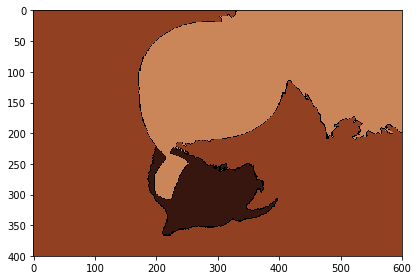

In [8]:
# On vous demande de ne pas modifier le code suivant
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

Ecrivez votre réponse dans cette case :